In [28]:
import pandas as pd
from collections import Counter
import sys
import os


## Cell 1: Import & Kiểm tra logic phân nhánh (Nhiệm vụ 1)

In [29]:


# 1. Thêm thư mục src vào hệ thống để Python tìm thấy file .py
sys.path.append(os.path.abspath('../src'))

from preprocessing import DataPreprocessor

# Khởi tạo với đường dẫn thực tế
pre = DataPreprocessor(
    stopwords_path='../data/dictionaries/vietnamese_stopwords.txt',
    teencode_path='../data/dictionaries/teencode.csv'
)

test_cmt = "Sản phẩm này thì là mà rất ok, ko béo tý nào"

print("--- KIỂM TRA LOGIC PHÂN NHÁNH ---")
print("1. Statistical (Xóa Stopwords):", pre.process(test_cmt, target_model='statistical'))
print("2. Deep Learning (Giữ Stopwords):", pre.process(test_cmt, target_model='deep_learning'))

[Statistical Mode] Đã load 48 stopwords.
Đã load 87 teencode từ file .csv
--- KIỂM TRA LOGIC PHÂN NHÁNH ---
1. Statistical (Xóa Stopwords): sản_phẩm rất ok không béo tý
2. Deep Learning (Giữ Stopwords): sản_phẩm này thì là mà rất ok không béo tý nào


## Cell 2: (Khảo sát & Xuất file)

In [30]:
# 1. Chạy file script .py để tự động tạo 6 file CSV
!python ../src/preprocessing.py

[Statistical Mode] Đã load 48 stopwords.
Đã load 87 teencode từ file .csv

 Đang xử lý cho chế độ: statistical

 Đang xử lý cho chế độ: deep_learning

Hoàn thành xuất 6 file output tại data/processed/!



100%|██████████| 6182/6182 [00:02<00:00, 2754.08it/s]

100%|██████████| 6182/6182 [00:01<00:00, 3331.27it/s]


In [31]:
# 2. Khảo sát Teencode: Tìm từ lạ (Unknown words)
# Đọc tập train_stat vừa tạo ra
df_train = pd.read_csv('../data/processed/train_stat.csv')

# Đếm tần suất các từ sau khi đã clean
all_text = " ".join(df_train['text'].astype(str))
word_counts = Counter(all_text.split())

print("Top 20 từ sau khi tiền xử lý:")
print(word_counts.most_common(20))

Top 20 từ sau khi tiền xử lý:
[('face', 880), ('đẹp', 707), ('không', 627), ('with', 614), ('quá', 452), ('có', 411), ('nhìn', 371), ('em', 320), ('heart', 308), ('tears', 293), ('of', 283), ('smiling', 282), ('joy', 282), ('red', 252), ('cũng', 246), ('thấy', 242), ('chị', 239), ('như', 226), ('người', 217), ('được', 216)]


## Cell 3: Vẽ biểu đồ Top 20 từ vựng

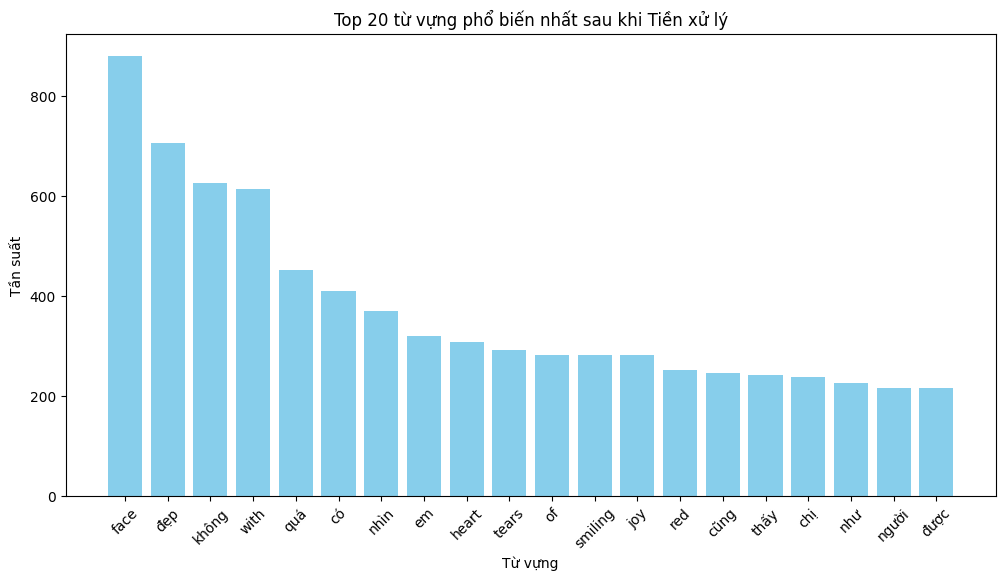

In [32]:
import matplotlib.pyplot as plt

top_words = [
    ('face', 880), ('đẹp', 707), ('không', 627), ('with', 614), ('quá', 452), 
    ('có', 411), ('nhìn', 371), ('em', 320), ('heart', 308), ('tears', 293),
    ('of', 283), ('smiling', 282), ('joy', 282), ('red', 252), ('cũng', 246), 
    ('thấy', 242), ('chị', 239), ('như', 226), ('người', 217), ('được', 216)
]
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 từ vựng phổ biến nhất sau khi Tiền xử lý')
plt.xlabel('Từ vựng')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)
plt.show()

## Cell 4: Kiểm tra tính nhất quán của 6 file Output
Để xác nhận cuối cùng về số lượng mẫu trong 3 tập (Train/Val/Test) đã đúng tỷ lệ 70:15:15 chưa

In [33]:
processed_dir = '../data/processed'
for file in sorted(os.listdir(processed_dir)):
    if file.endswith('.csv'):
        df_tmp = pd.read_csv(os.path.join(processed_dir, file))
        print(f"File: {file:<15} | Số dòng: {len(df_tmp)} | Cột: {list(df_tmp.columns)}")

File: dummy_data.csv  | Số dòng: 6182 | Cột: ['comment_id', 'original_text', 'text', 'platform', 'date_collected', 'collector', 'has_emoji', 'label']
File: test.csv        | Số dòng: 682 | Cột: ['id', 'text', 'label']
File: test_dl.csv     | Số dòng: 683 | Cột: ['id', 'text', 'label']
File: test_stat.csv   | Số dòng: 682 | Cột: ['id', 'text', 'label']
File: train.csv       | Số dòng: 3181 | Cột: ['id', 'text', 'label']
File: train_dl.csv    | Số dòng: 3182 | Cột: ['id', 'text', 'label']
File: train_stat.csv  | Số dòng: 3181 | Cột: ['id', 'text', 'label']
File: val.csv         | Số dòng: 682 | Cột: ['id', 'text', 'label']
File: val_dl.csv      | Số dòng: 682 | Cột: ['id', 'text', 'label']
File: val_stat.csv    | Số dòng: 682 | Cột: ['id', 'text', 'label']
